## Mushroom Analysis

Attribute Information: (classes: edible = e, poisonous = p)

cap-shape: bell = b,conical = c, convex = x, flat = f, knobbed = k, sunken = s

cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
 
cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y

bruises: bruises = t, no = f 

odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s

gill-attachment: attached = a, descending = d, free = f, notched = n

gill-spacing: close = c, crowded = w, distant = d

gill-size: broad = b, narrow = n

gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p , purple = u, red = e, white = w, yellow = y

stalk-shape: enlarging = e, tapering = t

stalk-root: bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?

stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s

stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s

stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

veil-type: partial = p, universal = u

veil-color: brown = n, orange = o, white = w, yellow = y

ring-number: none = n, one = o, two = t

ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z

spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y

population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y

habitat: grasses = g,leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import pickle

In [2]:
# loading data
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Check data

In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data["stalk-root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

### Data Visualisation

e    4208
p    3916
Name: class, dtype: int64


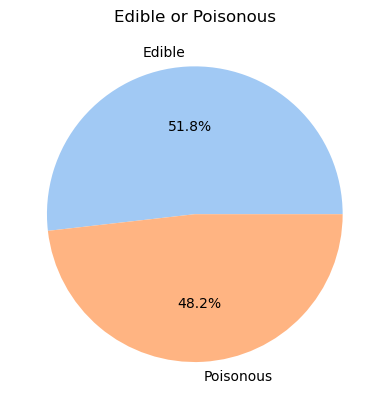

In [6]:
# Edible/Poisonous
print(data["class"].value_counts())

sns.set_palette("pastel")
plt.pie(data["class"].value_counts(), labels = ["Edible", "Poisonous"], autopct = "%1.1f%%")
plt.title("Edible or Poisonous")
plt.show()

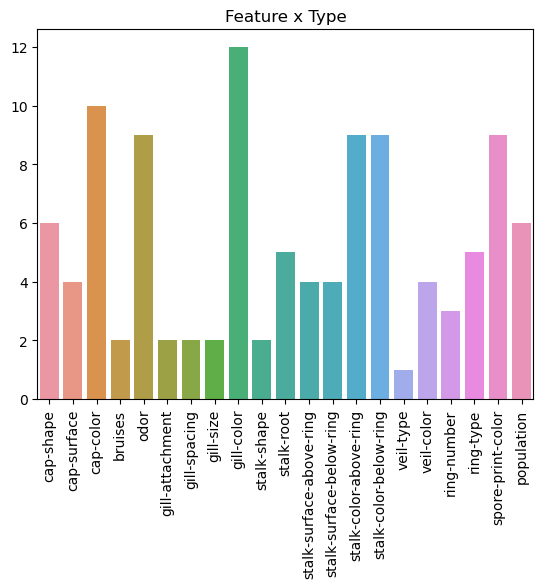

In [7]:
# Feature x category
feature_data = pd.DataFrame(columns = data.columns, index = range(1))

for feature in feature_data:
    feature_data[feature][0] = len(data[feature].unique())

sns.barplot(data = feature_data.iloc[:, 1: -1])
plt.xticks(rotation = 90)
plt.title("Feature x Type")
plt.show()

In [8]:
# One Hot Encoding function
encoder = OneHotEncoder()

def one_hot_encoder():

    new_data = pd.DataFrame(index = range(len(data.index)))

    for column in data:
        encoded_data = pd.DataFrame(encoder.fit_transform(data[[column]]).toarray())
        encoded_data.columns = encoder.get_feature_names_out()
        new_data = new_data.join(encoded_data.astype(int))

    return new_data

new_data = one_hot_encoder()

In [9]:
new_data.drop("class_p", axis = 1, inplace = True)
new_data.rename(columns = {"class_e": "edibility"}, inplace = True)
new_data

,edibility,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Logistic Regression

In [10]:
#define X and y
X = new_data.iloc[:, 1:]
y = new_data.iloc[:, 0]

#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [11]:
#define model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

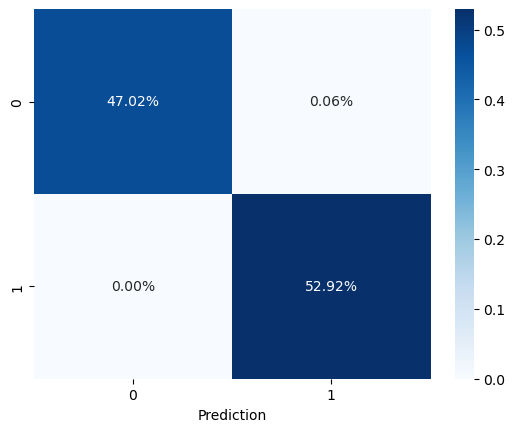

In [13]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot cm
sns.heatmap(cm/np.sum(cm), annot = True, cmap = "Blues", fmt = ".2%")
plt.xlabel("Prediction")
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       860

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [15]:
# save model
save = pickle.dumps(model)
saved_model = open("saved_model.pkl", "wb")
pickle.dump(model, saved_model)
saved_model.close()

In [16]:
loaded_model =  pickle.load(open("saved_model.pkl", "rb"))
loaded_model

LogisticRegression()